- [참조]: https://wikidocs.net/55409

# `nn.Module`로 다중 선형 회귀(Multivariable Linear Regression) 구현하기
- PyTorch에서 제공하는 함수 불러 사용 
  - 선형 회귀 모델: `nn.Linear()`
  - 평균 제곰 오차: `nn.functional.mse_loss()` 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
torch.manual_seed(1)

- 예시) 3개 x --> 하나의 y 값 예측
   - `H(x) = w1* x1 + w2*x2 + w3*x3 + b`

In [3]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [4]:
# 모델을 선언 및 초기화.
# 다중 선형 회귀 --> input_dim=3, output_dim=1
# model에 3개의 가중치(W), 1개의 편향(b) 저장

model = nn.Linear(3,1)

In [5]:
# 저장된 W, b 확인 
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [6]:
## optimizer 정의
# 학습률(learning rate = 0.00001 = 1e-5)
# lr = 0.01 ---> 모델이 필요한 크기보다 높은 경우 기울기 발산!

optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

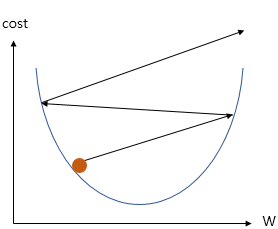

In [7]:
# 전체 훈련 데이터 2000번 경사하강법(SGD) 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

  # 가설 H(x)
  prediction = model(x_train)

  # 비용함수 cost 계산 
  ### PyTorch에서 제공하는 평군 제곱 오차 함수 (MSE)
  cost = F.mse_loss(prediction, y_train)

  # cost -> H(x) 개선 
  optimizer.zero_grad() # gradient = 0 초기화
  cost.backward()       # cost 자동 미분 -> gradient 계산 
  optimizer.step()      # W, b 업데이트

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} | Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))
# 전체 훈련 데이터 2000번 경사하강법(SGD) 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

  # 가설 H(x)
  prediction = model(x_train)

  # 비용함수 cost 계산 
  ### PyTorch에서 제공하는 평군 제곱 오차 함수 (MSE)
  cost = F.mse_loss(prediction, y_train)

  # cost -> H(x) 개선 
  optimizer.zero_grad() # gradient = 0 초기화
  cost.backward()       # cost 자동 미분 -> gradient 계산 
  optimizer.step()      # W, b 업데이트

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} | Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

## ====> 결과: cost의 값이 매우 작음 -> W, b 값도 최적화가 되었는지 확인하기

Epoch    0/2000 | Cost: 31667.597656
Epoch  100/2000 | Cost: 0.225993
Epoch  200/2000 | Cost: 0.223911
Epoch  300/2000 | Cost: 0.221941
Epoch  400/2000 | Cost: 0.220059
Epoch  500/2000 | Cost: 0.218271
Epoch  600/2000 | Cost: 0.216575
Epoch  700/2000 | Cost: 0.214950
Epoch  800/2000 | Cost: 0.213413
Epoch  900/2000 | Cost: 0.211952
Epoch 1000/2000 | Cost: 0.210560
Epoch 1100/2000 | Cost: 0.209232
Epoch 1200/2000 | Cost: 0.207967
Epoch 1300/2000 | Cost: 0.206761
Epoch 1400/2000 | Cost: 0.205619
Epoch 1500/2000 | Cost: 0.204522
Epoch 1600/2000 | Cost: 0.203484
Epoch 1700/2000 | Cost: 0.202485
Epoch 1800/2000 | Cost: 0.201542
Epoch 1900/2000 | Cost: 0.200635
Epoch 2000/2000 | Cost: 0.199769
Epoch    0/2000 | Cost: 0.199762
Epoch  100/2000 | Cost: 0.198937
Epoch  200/2000 | Cost: 0.198153
Epoch  300/2000 | Cost: 0.197401
Epoch  400/2000 | Cost: 0.196682
Epoch  500/2000 | Cost: 0.195994
Epoch  600/2000 | Cost: 0.195332
Epoch  700/2000 | Cost: 0.194707
Epoch  800/2000 | Cost: 0.194104
Epoch 

In [8]:
# 임의의 값 x = [73, 80, 75] 넣어 예측 y 값 확인
new_var = torch.FloatTensor([[73, 80, 75]])

# 예측 y -> pred_y에 저장
pred_y = model(new_var)      # forward 연산 -> 자동 미분 
print(pred_y)

tensor([[151.3064]], grad_fn=<AddmmBackward0>)


In [12]:
# x -> 훈련 데이터로 사용한 값 
# x_train = [73, 80, 75] 일때 -> y_train = [152]
# y_train=[152] 과 pred_y=[151.3064] 비교하여 어느정도 3개의 w, b 값이 최적화 됨을 확인!! 

In [14]:
## 학습 후 3개의 w, b 값 확인 
print(list(model.parameters()))

# 결과: w1, w2, w3 = [0.9737, 0.4658, 0.5691] , b = [0.2814]

[Parameter containing:
tensor([[0.9737, 0.4658, 0.5691]], requires_grad=True), Parameter containing:
tensor([0.2814], requires_grad=True)]
